In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('magic04.data')


In [4]:
df.columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]


In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


# decision tree using the gini index


In [6]:
df.replace({"g": 1, "h": 0}, inplace=True)

In [7]:
# separate the data into x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
# sample the data using the over sampling technique
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x, y = ros.fit_resample(x, y)

In [9]:
# split the data into the training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [10]:
# prompt: generate the decision tree classification model  , train and test the data set and return the accuracy percentage , classification report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

# classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8917494425299006
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2439
           1       0.92      0.86      0.89      2494

    accuracy                           0.89      4933
   macro avg       0.89      0.89      0.89      4933
weighted avg       0.89      0.89      0.89      4933



In [11]:
print("training accuracy" , clf.score(x_train, y_train)*100)
print("testing accuracy" , clf.score(x_test, y_test)*100)

training accuracy 100.0
testing accuracy 89.17494425299006


Text(95.72222222222221, 0.5, 'Truth')

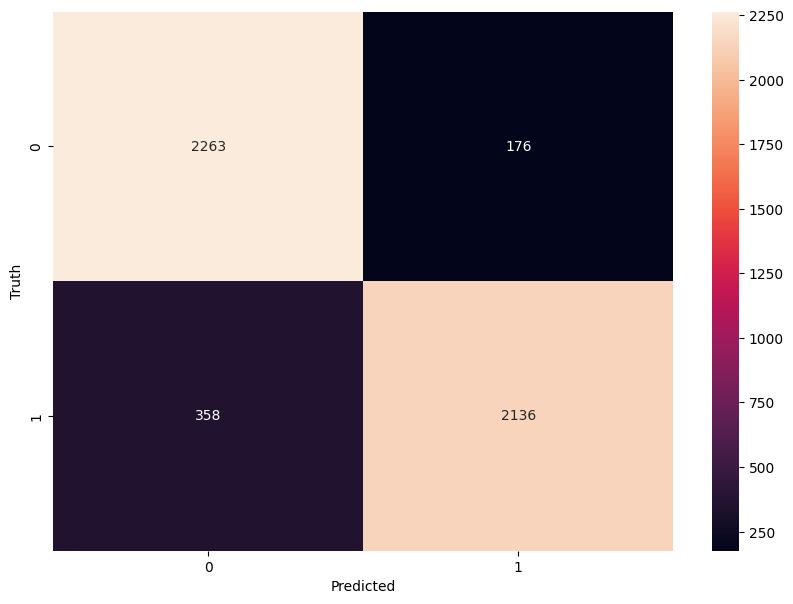

In [12]:
# prompt: draw the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# decision tree using the entropy

In [13]:
# sample the data using the underfitting technique
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
x1, y1 = ros.fit_resample(x, y)


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1 ,y1, test_size=0.2, random_state=200)

In [21]:
# prompt: generate decision tree classification model , train and test the data  and return the classification report

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2478
           1       0.91      0.87      0.89      2455

    accuracy                           0.89      4933
   macro avg       0.89      0.89      0.89      4933
weighted avg       0.89      0.89      0.89      4933



Text(95.72222222222221, 0.5, 'actual')

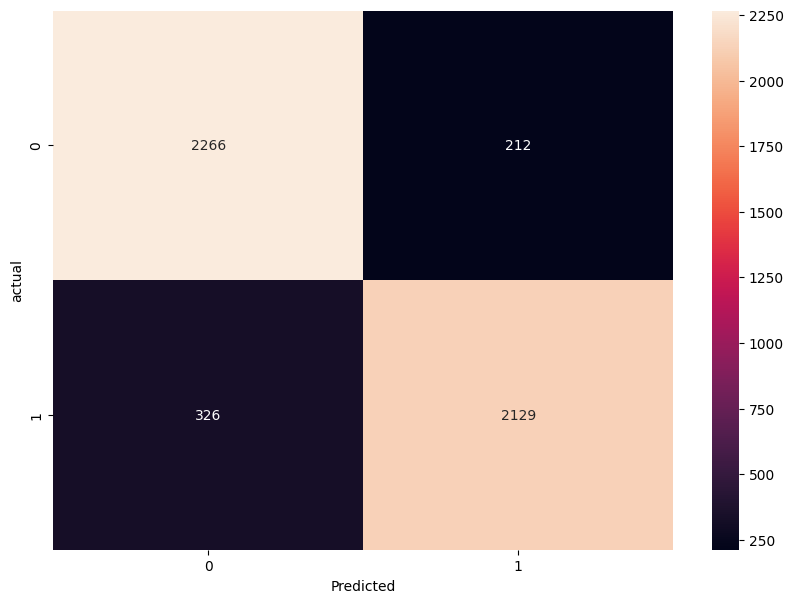

In [22]:
# prompt: draw the confusion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')
